In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
pd.set_option('float_format', '{:.2f}'.format)

In [4]:
df = pd.read_excel('US Superstore data.xlsx')

In [5]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52


In [7]:
df.shape

(9994, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [12]:
df.nunique()

Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            5457
Quantity           14
Discount           12
Profit           5157
dtype: int64

In [14]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [16]:
#Apagar colunas não necesssarias
apagar_colunas = ['Row ID', 'Country']
df = df.drop(apagar_colunas, axis = 1)

In [20]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit', 'Order Month'],
      dtype='object')

# Tópico 01 : Vendas e Desempenho dos Produtos

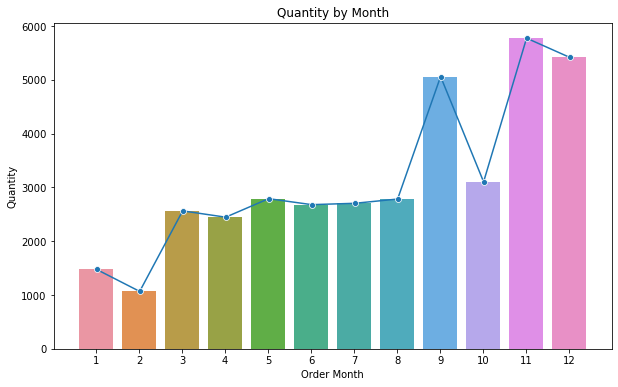

In [158]:
#Quantidade de vendas por mês.

df['Order Month'] = df['Order Date'].dt.month #Criar coluna somente com o mês de 'Order Date'
quantidade_vendas = df.groupby('Order Month')['Quantity'].sum().reset_index()

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data = quantidade_vendas, x='Order Month', y='Quantity',  ax=ax)

# Ajustar deslocamento do eixo x para o gráfico de linha
line_shift = 0.01 #Deslocamento no eixo x

# Gráfico de linhas
sns.lineplot(data = quantidade_vendas, x=quantidade_vendas.index + line_shift, y='Quantity', marker='o')
ax.set_title('Quantity by Month');

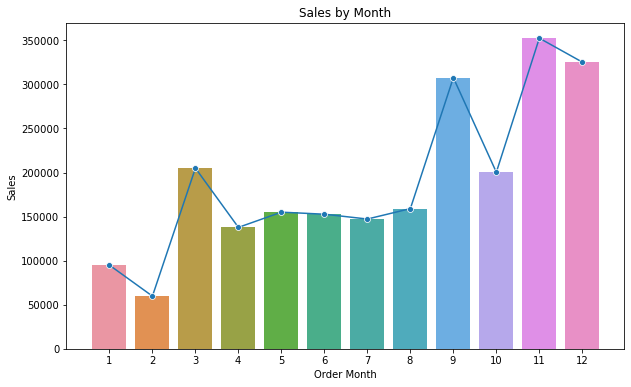

In [157]:
#Qual é o desempenho de vendas ao longo do tempo?

vendas_mensais = df.groupby('Order Month')['Sales'].sum().reset_index()

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data = vendas_mensais, x='Order Month', y='Sales',  ax=ax)

# Ajustar deslocamento do eixo x para o gráfico de linha
line_shift = 0.01

# Gráfico de linhas
sns.lineplot(data = vendas_mensais, x=sales_by_month.index + line_shift, y='Sales', ax=ax, marker='o')

ax.set_title('Sales by Month');

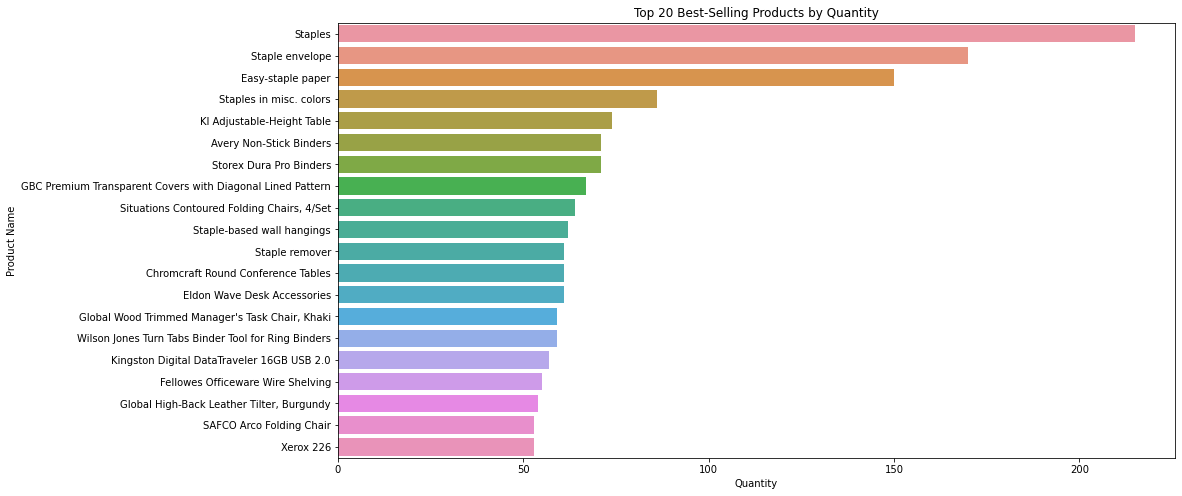

In [159]:
#Top 20 Produtos mais vendidos em termos de quantidade.


quantidade_produtos = df.groupby('Product Name')['Quantity'].sum().sort_values(ascending = False).reset_index().head(20)


plt.figure(figsize=(15, 8))
sns.barplot(data = quantidade_produtos, y='Product Name', x='Quantity')
plt.title('Top 20 Best-Selling Products by Quantity');

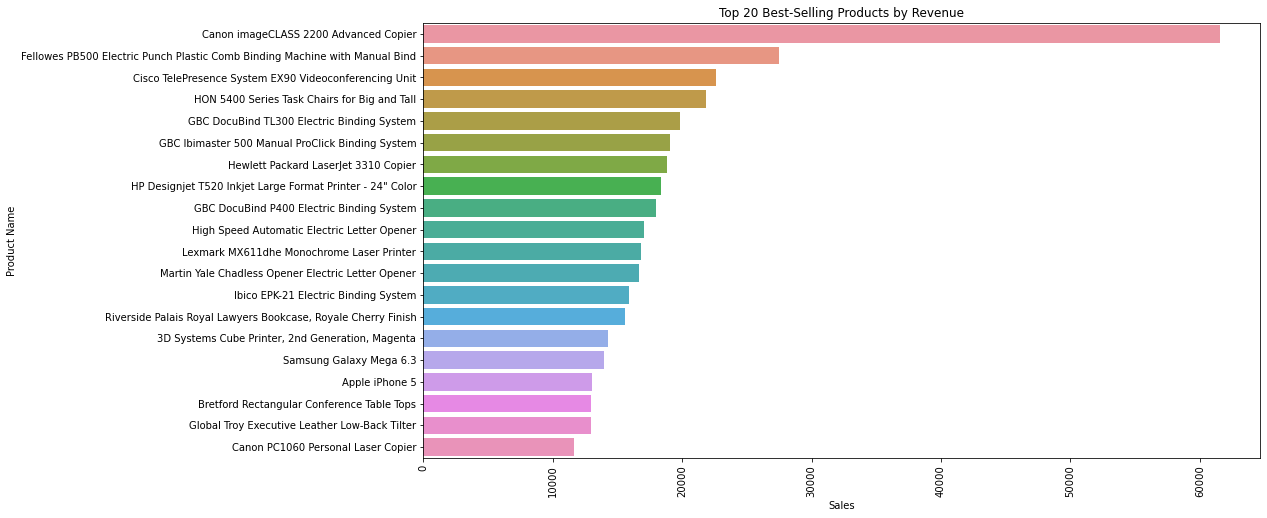

In [40]:
#Top 20 Produtos com maiores receitas


receita = df.groupby('Product Name')['Sales'].sum().sort_values(ascending = False).reset_index().head(20)


#Creat figure and axis
plt.figure(figsize=(15, 8))


#Bar Graphic
sns.barplot(data = receita, y='Product Name', x='Sales')


#Title
plt.title('Top 20 Best-Selling Products by Revenue')


#X-axis rotation
plt.xticks(rotation = 90);



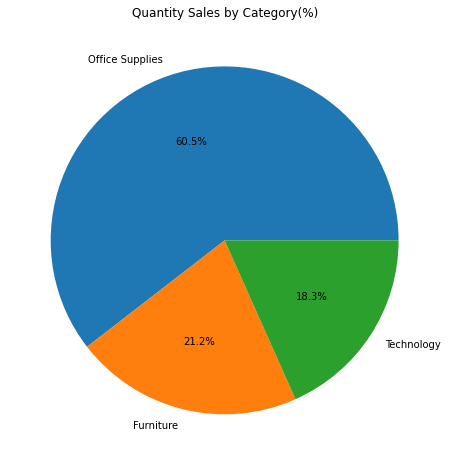

In [46]:
#Quantidade de vendas por Categoria


quantidade_por_categoria = df.groupby('Category')['Quantity'].sum().sort_values(ascending = False).reset_index()


#Creat figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

ax.pie(quantidade_por_categoria['Quantity'], labels= quantidade_por_categoria['Category'], autopct='%1.1f%%')

ax.set_title('Quantity Sales by Category(%)');

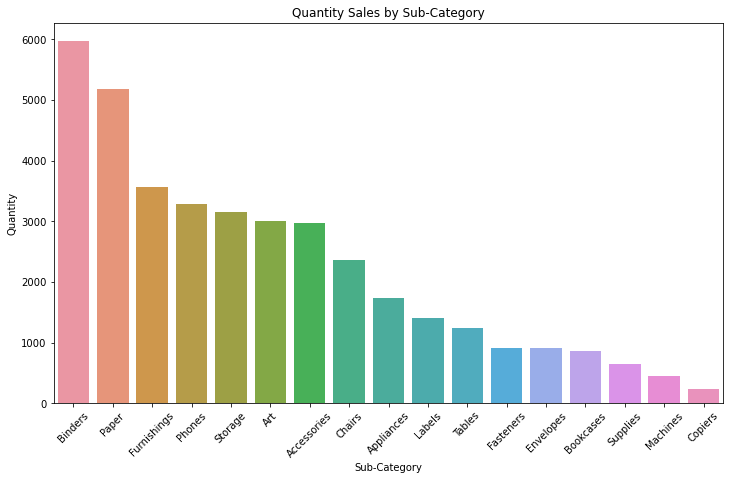

In [51]:
#Quantidade de vendas por Sub-Categoria

quantidade_por_subcategoria = df.groupby('Sub-Category')['Quantity'].sum().sort_values(ascending = False).reset_index()


plt.figure(figsize = (12,7))
sns.barplot(data = quantidade_por_subcategoria, x = 'Sub-Category', y = 'Quantity')
plt.title('Quantity Sales by Sub-Category');
plt.xticks(rotation = 45);

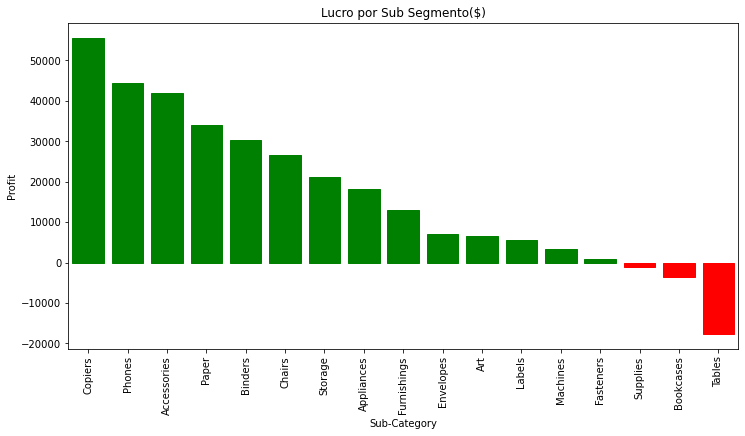

In [52]:
#Qual o Lucro por Sub-Categoria?

lucro_subcategoria = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending = False).reset_index()


fig, ax = plt.subplots(figsize=(12, 6))

# Gráfico de barras
sns.barplot(data = lucro_subcategoria, x='Sub-Category', y='Profit', ax=ax)

# Ajustar cores dos valores negativos
bars = ax.patches
for bar in bars:
    altura = bar.get_height()
    if altura < 0:
        bar.set_color('red')
    else:
        bar.set_color('green')

plt.title('Profit by Sub-Category($)')
plt.xticks(rotation = 90);


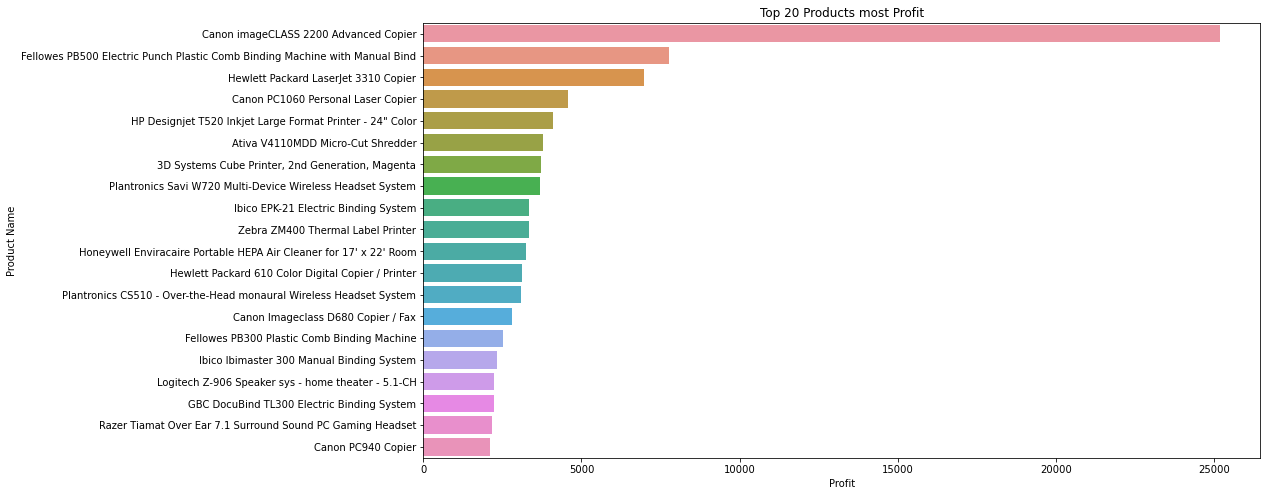

In [59]:
#Top 20 Produtos mais lucrativos

lucro_produto = df.groupby('Product Name')['Profit'].sum().sort_values(ascending = False).reset_index().head(20)


plt.figure(figsize = (15,8))
plt.title('Top 20 Products most Profit')
sns.barplot(data = lucro_produto, y = 'Product Name', x = 'Profit');

In [69]:
#Quais são os produtos com maior margem de lucro mensal?

df['Profit Margin'] = (df['Profit']/df['Sales'])*100


margem_lucro = df.groupby('Order Month')[['Profit Margin','Product Name']].max().sort_values('Order Month').reset_index()
margem_lucro


,Order Month,Profit Margin,Product Name
0,1,50.02,netTALK DUO VoIP Telephone Service
1,2,50.00,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...
2,3,50.02,i.Sound Portable Power - 8000 mAh
3,4,50.01,iKross Bluetooth Portable Keyboard + Cell Phon...
4,5,50.02,netTALK DUO VoIP Telephone Service
5,6,50.00,netTALK DUO VoIP Telephone Service
6,7,50.01,netTALK DUO VoIP Telephone Service
7,8,50.00,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...
8,9,50.00,netTALK DUO VoIP Telephone Service
9,10,50.02,iOttie HLCRIO102 Car Mount


In [78]:
#Variação percentual do Lucro entre meses

aux1 = df.groupby('Order Month')['Profit'].sum().reset_index()


aux1['Profit_Percent'] = aux1['Profit'].pct_change() * 100

aux1

,Order Month,Profit,Profit_Percent
0,1,9134.48,NaN
1,2,10294.62,12.70
2,3,28594.64,177.76
3,4,11587.57,-59.48
4,5,22411.36,93.41
5,6,21285.87,-5.02
6,7,13832.75,-35.01
7,8,21777.07,57.43
8,9,36857.50,69.25
9,10,31784.20,-13.76


posx and posy should be finite values
posx and posy should be finite values


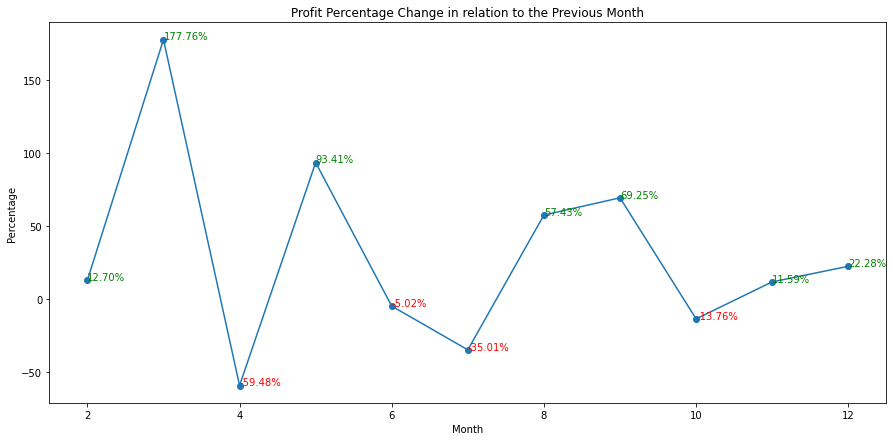

In [83]:
# Criar o gráfico de linhas
plt.figure(figsize=(15, 7))
plt.plot(aux1['Order Month'], aux1['Profit_Percent'], marker='o')


# Adicionar as anotações de texto com os valores de variação
for i in range(len(aux1)):
    x = aux1['Order Month'][i]
    y = aux1['Profit_Percent'][i]
    color = 'red' if y < 0 else 'green'
    plt.text(x, y, f'{y:.2f}%', color=color)

    
plt.xlabel('Month')
plt.ylabel('Percentage')
plt.title('Profit Percentage in relation to the Previous Month');


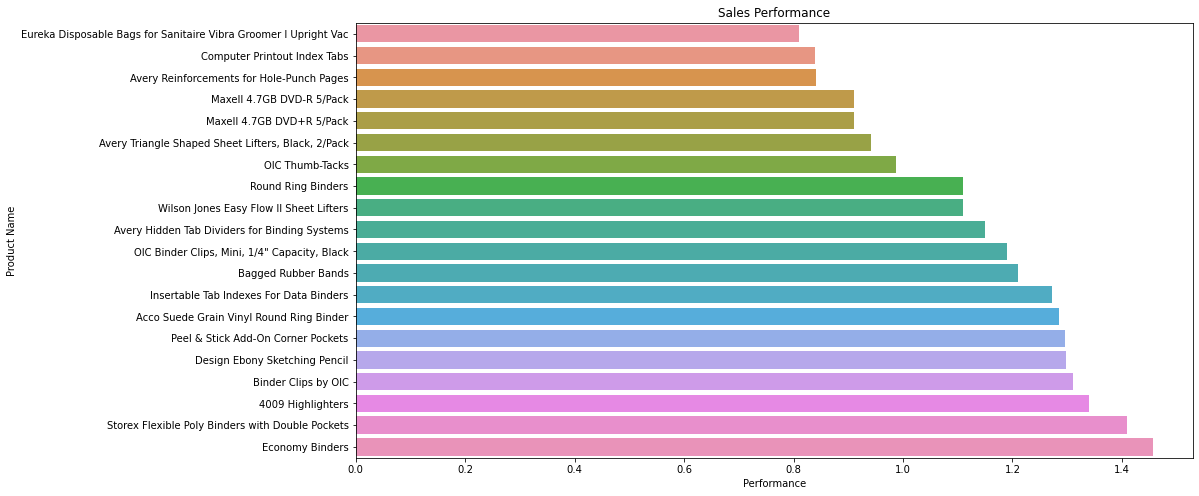

In [90]:
#Top 20 produtos com menor desempenho de vendas?

df['Performance'] = df['Sales']/df['Quantity'] #Ticket médio do produto


baixo_desempenho = df.groupby('Product Name')['Performance'].mean().sort_values().reset_index().head(20)


plt.figure(figsize = (15,8))
sns.barplot(data = baixo_desempenho, y = 'Product Name', x = 'Performance')
plt.title('Sales Performance');

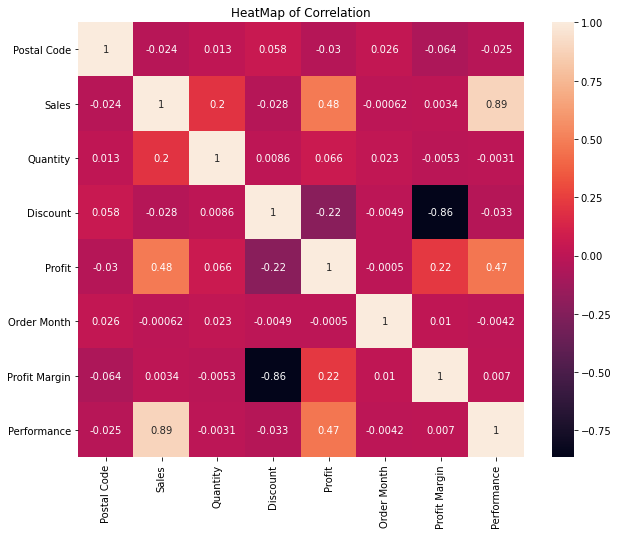

In [93]:
#Existe uma correlação entre descontos oferecidos e vendas?

colunas_numericas = df.select_dtypes(exclude='object')


# Calcular a matriz de correlação
corr = colunas_numericas.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True)
plt.title('HeatMap of Correlation');


## Tópico 02: Segmentação de Clientes 

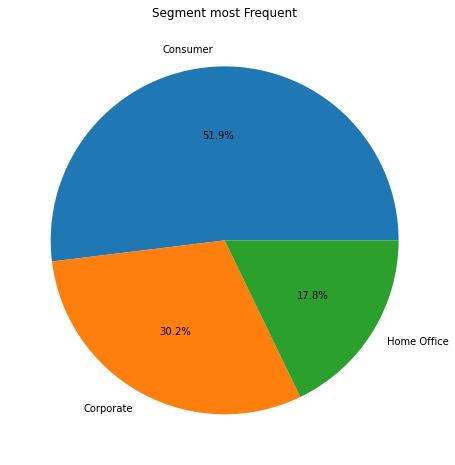

In [96]:
#Quais são os segmentos de clientes mais frequentes?

seg = df.groupby('Segment')['Quantity'].count().reset_index()


fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(seg['Quantity'], labels= seg['Segment'], autopct='%1.1f%%')
ax.set_title('Segment most Frequent');


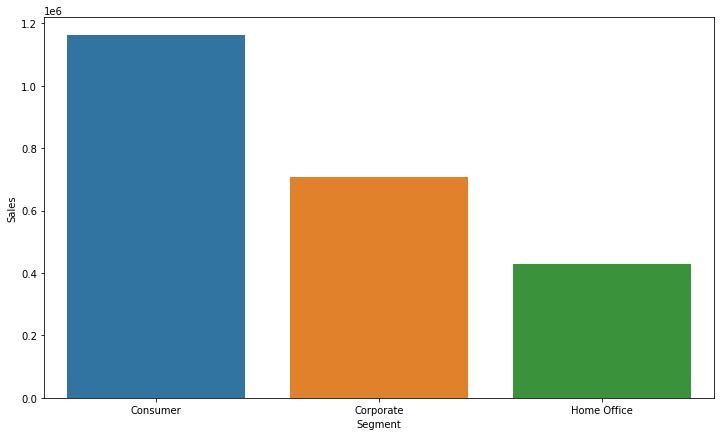

In [97]:
#Qual segmento gera mais vendas?

vendas_segmento = df.groupby('Segment')['Sales'].sum().reset_index()


plt.figure(figsize = (12,7))
sns.barplot(data = vendas_segmento, x = 'Segment', y = 'Sales');

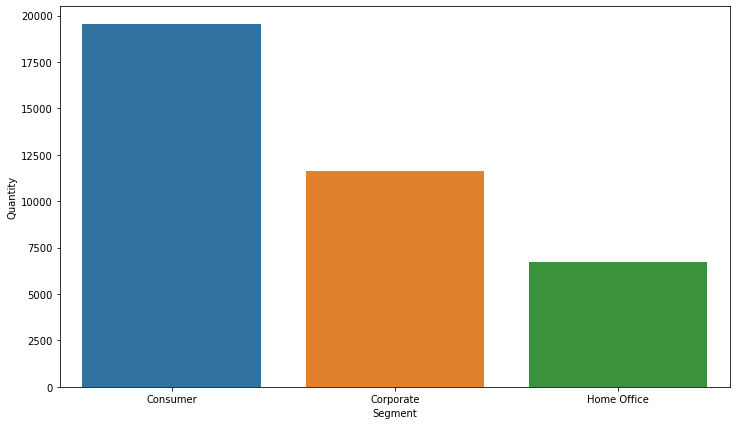

In [144]:
#Quais segmentos têm a maior quantidade de pedidos?

quantidade_por_segmento = df.groupby('Segment')['Quantity'].sum().reset_index()


plt.figure(figsize = (12,7))
sns.barplot(data = quantidade_por_segmento, x = 'Segment', y = 'Quantity');

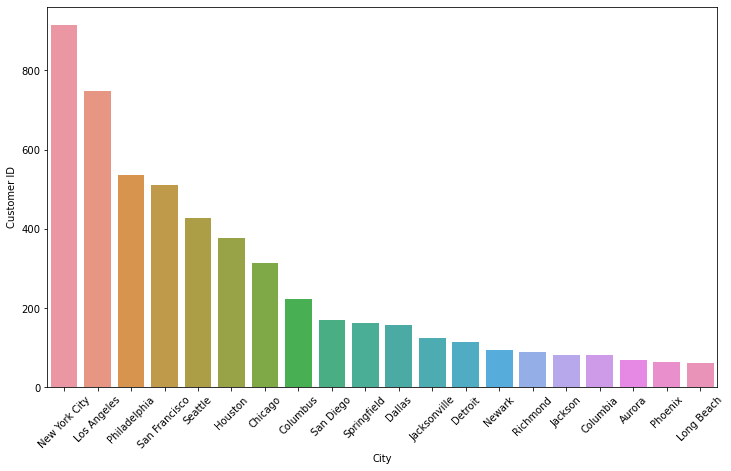

In [103]:
#Top 20 cidade com mais clientes?

clientes_por_cidade = df.groupby('City')['Customer ID'].count().sort_values(ascending = False).reset_index().head(20)


plt.figure(figsize = (12,7))
sns.barplot(data = clientes_por_cidade, x = 'City', y = 'Customer ID')
plt.xticks(rotation = 45);

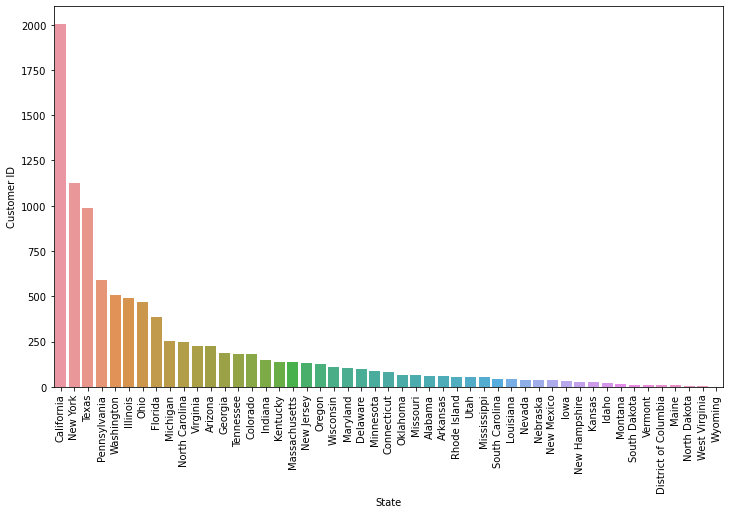

In [104]:
#Quantidade de clientes por estado.

clientes_por_estados = df.groupby('State')['Customer ID'].count().sort_values(ascending = False).reset_index()


plt.figure(figsize = (12,7))
sns.barplot(data = clientes_por_estados, x = 'State', y = 'Customer ID')
plt.xticks(rotation = 90);

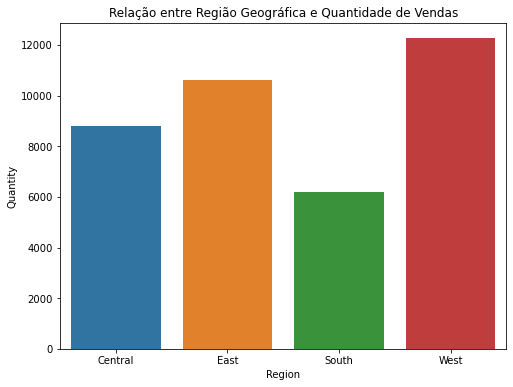

In [106]:
#Qual a quantidade de vendas por Região?

vendas_por_regiao = df.groupby('Region')['Quantity'].sum().reset_index()


plt.figure(figsize=(8, 6))
sns.barplot(data = vendas_por_regiao, x='Region', y='Quantity')
plt.title('Relação entre Região Geográfica e Quantidade de Vendas')
plt.show()


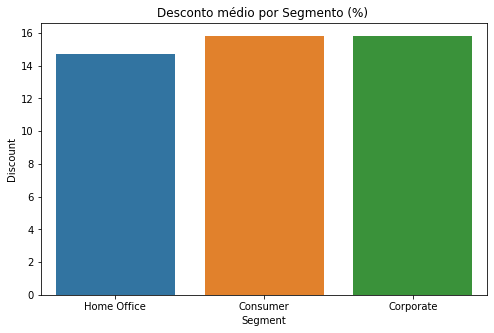

In [107]:
#Qual o desconto médio de cada segmento?

desconto_por_segmento = df.groupby('Segment')['Discount'].mean().sort_values().reset_index()
desconto_por_segmento['Discount'] = desconto_por_segmento['Discount']*100


plt.figure(figsize=(8, 5))
sns.barplot(data = desconto_por_segmento, x='Segment', y='Discount')
plt.title('Desconto médio por Segmento (%) ')
plt.show()


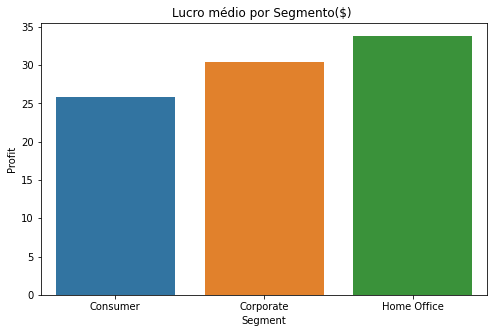

In [111]:
#Qual o lucro médio de cada segmento?

lucro_medio_por_segmento = df.groupby('Segment')['Profit'].mean().sort_values().reset_index()


plt.figure(figsize=(8, 5))
sns.barplot(data = lucro_medio_por_segmento, x='Segment', y='Profit')
plt.title('Lucro médio por Segmento($) ');

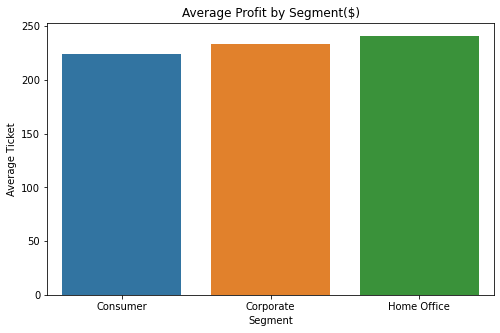

In [116]:
#Qual o valor do ticket médio de cada segmento?

tm_por_segmento = df.groupby('Segment')['Sales'].mean().sort_values().reset_index()
tm_por_segmento

plt.figure(figsize=(8, 5))
sns.barplot(data = tm_por_segmento, x='Segment', y='Sales')
plt.ylabel('Average Ticket')
plt.title('Average Profit by Segment($)');

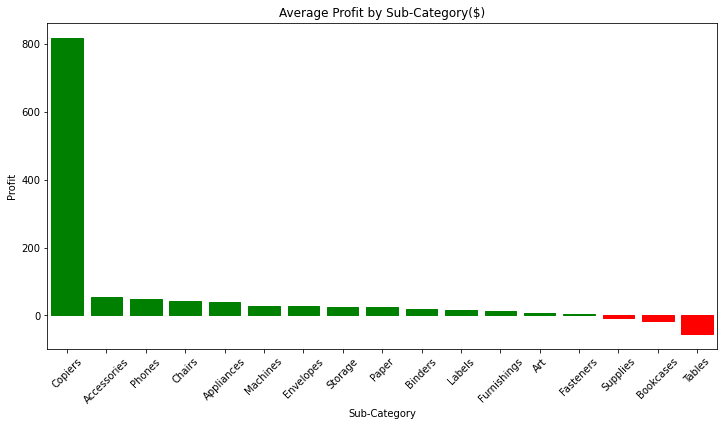

In [120]:
#Qual o Lucro médio de cada Sub Segmento?

lucro_subcategoria = df.groupby('Sub-Category')['Profit'].mean().sort_values(ascending = False).reset_index()

fig, ax = plt.subplots(figsize=(12, 6))


# Gráfico de barras
sns.barplot(data = lucro_subcategoria, x='Sub-Category', y='Profit', ax=ax)


# Ajustar cores dos valores negativos
bars = ax.patches
for bar in bars:
    altura = bar.get_height()
    if altura < 0:
        bar.set_color('red')
    else:
        bar.set_color('green')


# Configurar título e rótulos dos eixos
plt.title('Average Profit by Sub-Category($)')
plt.xticks(rotation = 45);


## Tópico 3: Eficiência de Remessa

In [121]:
#Quais são os tipos de envio mais comuns?

df.groupby('Ship Mode')['Order ID'].count().sort_values(ascending = False).reset_index()

,Ship Mode,Order ID
0,Standard Class,5968
1,Second Class,1945
2,First Class,1538
3,Same Day,543


In [123]:
#Qual é o tempo médio de envio?

df['Sending Time'] = (df['Ship Date'] - df['Order Date']).dt.days


tempo_medio_envio = round(df['Sending Time'].mean())


print(f'O tempo médio de envio são de {tempo_medio_envio} dias')

O tempo médio de envio são de 4 dias


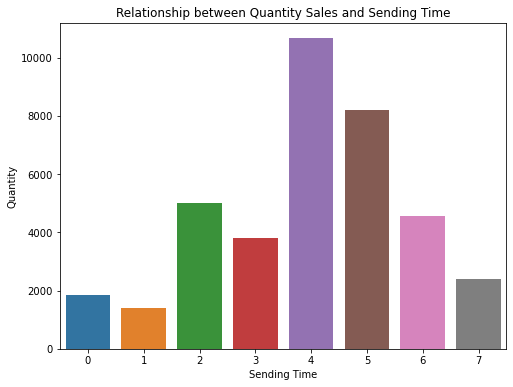

In [126]:
#Existe uma relação entre o tempo de envio e a quantidade de vendas?

tempo_envio_quantidade = df.groupby('Sending Time')['Quantity'].sum().reset_index()


plt.figure(figsize=(8, 6))
sns.barplot(data = tempo_envio_quantidade, x='Sending Time', y='Quantity')
plt.title('Relationship between Quantity Sales and Sending Time');


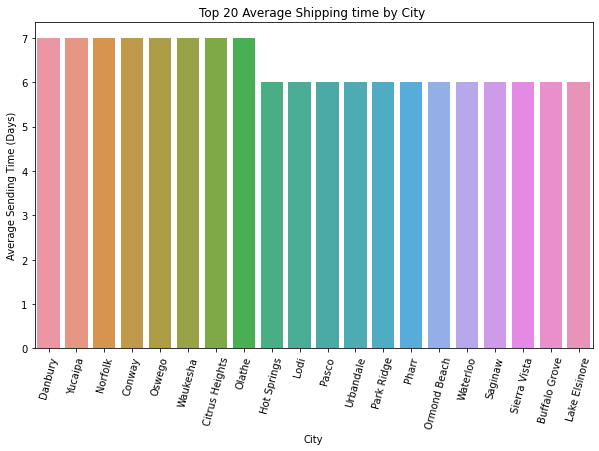

In [145]:
#Quais são as cidades com o tempo medio de envio mais longos?

tempo_medio_envio_cidade = df.groupby('City')['Sending Time'].mean().sort_values(ascending = False).reset_index().head(20).round()


plt.figure(figsize=(10, 6))
sns.barplot(data = tempo_medio_envio_cidade, x='City', y='Sending Time')


plt.ylabel('Average Sending Time (Days)')
plt.title('Top 20 Average Shipping time by City ')
plt.xticks(rotation = 75);


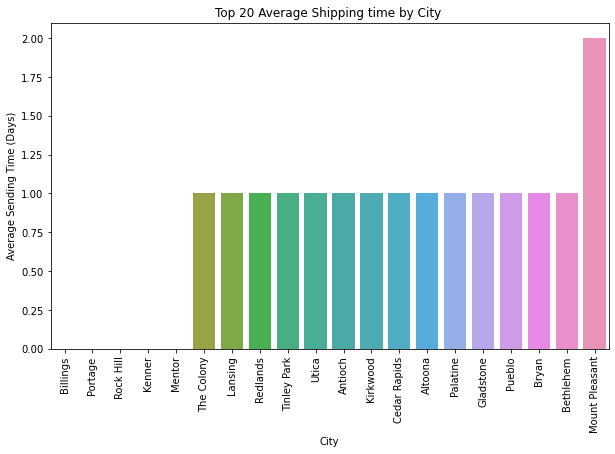

In [147]:
#Quais são as cidades com o tempo medio de envio mais curto?

tempo_envio_curto = df.groupby('City')['Sending Time'].mean().sort_values().reset_index().head(20).round()


plt.figure(figsize=(10, 6))
sns.barplot(data = tempo_envio_curto, x='City', y='Sending Time')
plt.xlabel('City')
plt.ylabel('Average Sending Time (Days)')
plt.title('Top 20 Average Shipping time by City ')
plt.xticks(rotation = 90);


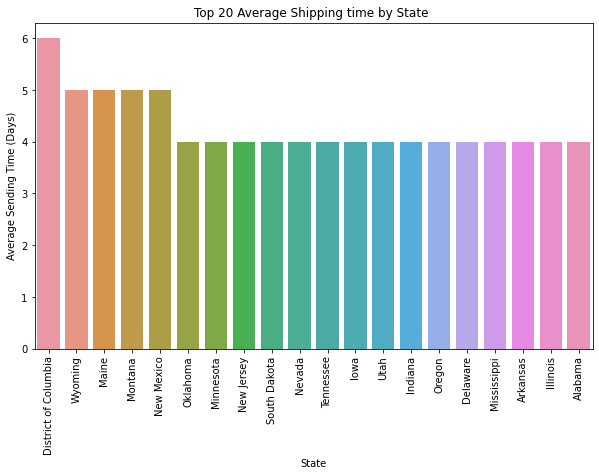

In [149]:
#Quais são os estados com o tempo medio de envio mais longos?

tempo_envio_longo_por_estado = df.groupby('State')['Sending Time'].mean().sort_values(ascending = False).reset_index().head(20).round()


plt.figure(figsize=(10, 6))
sns.barplot(data = tempo_envio_longo_por_estado, x='State', y='Sending Time')
plt.ylabel('Average Sending Time (Days)')
plt.title('Top 20 Average Shipping time by State ')
plt.xticks(rotation = 90);


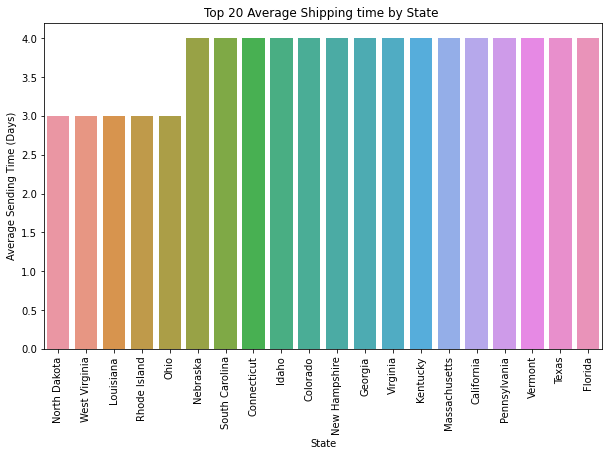

In [150]:
#Quais são os estados com os tempos de remessa mais curtos?

tempo_envio_curto_por_estado = df.groupby('State')['Sending Time'].mean().sort_values().reset_index().head(20).round()


plt.figure(figsize=(10, 6))
sns.barplot(data = tempo_envio_curto_por_estado, x='State', y='Sending Time')


plt.ylabel('Average Sending Time (Days)')
plt.title('Top 20 Average Shipping time by State ')
plt.xticks(rotation = 90);

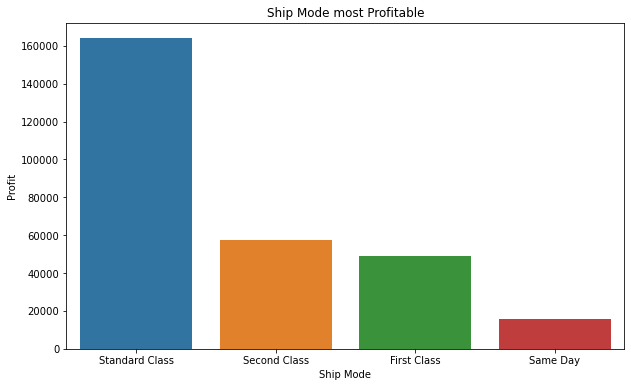

In [152]:
#Quais são os tipos de envio mais lucrativos?

envios_mais_lucrativos = df.groupby('Ship Mode')['Profit'].sum().sort_values(ascending = False).reset_index()
 
    
plt.figure(figsize=(10, 6))
sns.barplot(data = envios_mais_lucrativos, x='Ship Mode', y='Profit')
plt.title('Ship Mode most Profitable');

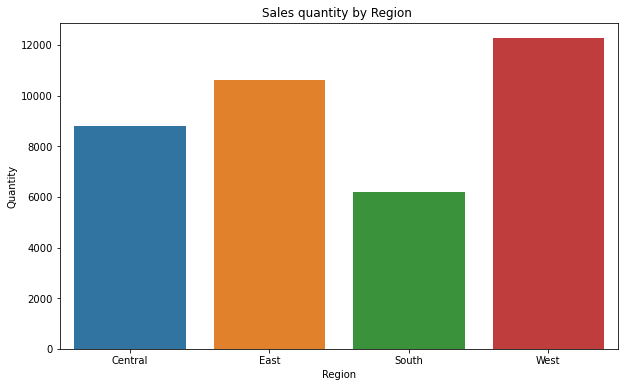

In [143]:
#Há diferenças significativas na quantidade de vendas entre as regiões geográficas?

quantidade_por_regiao = df.groupby('Region')['Quantity'].sum().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(data = quantidade_por_regiao, x='Region', y='Quantity')
plt.title('Sales quantity by Region ');